<a href="https://colab.research.google.com/github/ProfTodoMundo/DeepLearningReview/blob/main/Confusion_Matrix_for_a_3_Class_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective:
To understand the confusion matrix for 3 classes and the confusion matrix for multiple classes with a popular dataset – the IRIS DATASET.

The dataset has 3 flowers as outputs or classes, Versicolor, Virginia, and Setosa.

With the help of petal length, petal width, sepal length, and sepal width, the model has to classify the given instance as Versicolor or Virginia, or Setosa flower.

To apply a classifier model here, we can use logistic regression, but a decision tree classifier is applied to the above dataset. The dataset has 3 classes; hence we get a 3 X 3 confusion matrix.

In [ ]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

# using the attribute information as the column names
col_names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Class']
df =  pd.read_csv(csv_url, names = col_names)

In [ ]:
#Importing of dataset to dataframe.
df = pd.read_csv("../input/iris-flower-dataset/IRIS.csv")

FileNotFoundError: [Errno 2] No such file or directory: '../input/iris-flower-dataset/IRIS.csv'

In [ ]:
#To see first 5 rows of the dataset
df.head()
#To know the data types of the variables.
df.dtypes

Sepal_Length    float64
Sepal_Width     float64
Petal_Length    float64
Petal_Width     float64
Class            object
dtype: object

In [ ]:
print(iris.head())
print(iris.tail())
print(iris.dtypes)

   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width        Class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width           Class
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica
Sepal_Length    float64
Sepal_Width     float64
Petal_Length    float64
Petal_Width     float64
Class            object
dtype: object


In [ ]:
#Speceis is the output class,to know the count of each class we use value_counts()
df['Class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Class, dtype: int64

In [ ]:
#Separating independant variable and dependent variable("Species")
#X = df.drop(['Species'], axis=1)
X = df.drop(['Class'], axis=1)
y = df['Class']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(150, 4)
(150,)


In [ ]:
# Splitting the dataset to Train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
#to know the shape of the train and test dataset.
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


In [ ]:
#We use Support Vector classifier as a classifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [ ]:
#training the classifier using X_Train and y_train
clf = SVC(kernel = 'linear').fit(X_train,y_train)
clf.predict(X_train)

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-vir

In [ ]:
#Testing the model using X_test and storing the output in y_pred
y_pred = clf.predict(X_test)

In [ ]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test, y_pred)

In [ ]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['SETOSA','VERSICOLR','VIRGINICA'],
                     columns = ['SETOSA','VERSICOLR','VIRGINICA'])

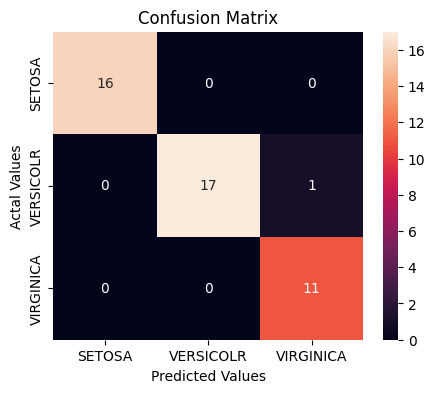

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

Example: Let us calculate the TP, TN, FP, and FN values for the class Setosa using the Above tricks:

TP: The actual value and predicted value should be the same. So concerning Setosa class, the value of cell 1 is the TP value.

FN: The sum of values of corresponding rows except for the TP value
FN = (cell 2 + cell3) = (0 + 0)= 0

FP: The sum of values of the corresponding column except for the TP value.
FP = (cell 4 + cell 7)= (0 + 0)= 0

TN: The sum of values of all columns and rows except the values of that class that we are calculating the values for.

TN = (cell 5 + cell 6 + cell 8 + cell 9)= 17 + 1 +0 + 11= 29

Similarly, for the Versicolor class, the values/metrics are calculated as below:

TP: 17 (cell 5)

FN : 0 + 1 = 1 (cell 4 +cell 6)

FP : 0 + 0 = 0 (cell 2 + cell 8)

TN : 16 +0 +0 + 11 =27 (cell 1 + cell 3 + cell 7 + cell 9).
